<a href="https://colab.research.google.com/github/mayurrajbharati/Sparks-Intern-Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Mayur Raj Bharati

**Task 2: Exploring Unsupervised Machine Learning**


We are provided with a  dataset 'iris' and we are expected to find optimal number of clusters and represent it visually.

**Step 1: Importing Essential Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Step 2: Loading dataset**

In [8]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data = data['data'], columns = data.feature_names)

In [11]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Here, we dropped the Target Column 'Species' as in unsupervised learning, we don't have any label values.

**Step 3: Data Wrangling**

In [12]:
df.shape

(150, 4)

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

No NaN as well as Null values present, so no Data Wrangling required.

**Step 4: Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


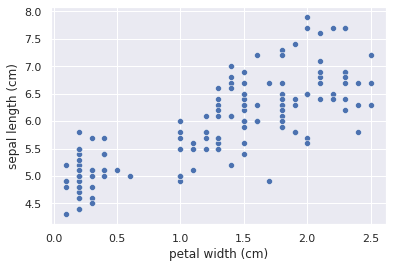

In [23]:
sns.scatterplot(df['petal width (cm)'], df['sepal length (cm)'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


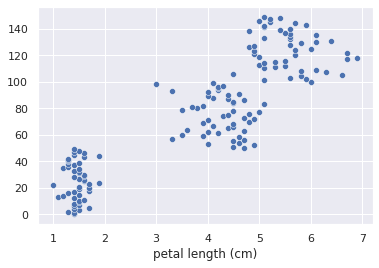

In [24]:
sns.scatterplot(df['petal length (cm)'], df.index)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


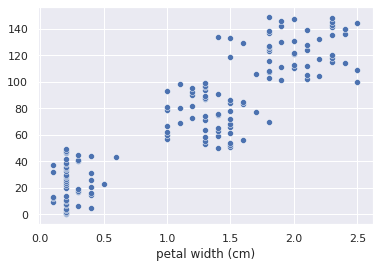

In [25]:
sns.scatterplot(df['petal width (cm)'], df.index)
plt.show()

So, we can see that three groups are formed. We are required to find the number of clusters (k). 
SO we consider clusters = 3

**Step 5: Scaling**

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
new_df = df.copy()
def make_min_max(new_df, col):
  MinMax = MinMaxScaler()
  new_df[col] = MinMax.fit_transform(new_df[[col]])
  return new_df

In [29]:
for col in new_df.iloc[:,:]:
  new_df = make_min_max(new_df, col)

In [30]:
new_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


**Step 6: Using Elbow Method to find Optimal number of clusters**

In [32]:
from sklearn.cluster import KMeans
wcss = {}

In [35]:
for i in range(1,6,1):
  kmeans = KMeans(n_clusters =i,max_iter = 300)
  kmeans.fit(new_df)
  wcss[i] = kmeans.inertia_

print(wcss)

{1: 41.16611042137329, 2: 12.127790750538194, 3: 6.982216473785234, 4: 5.516933472040371, 5: 4.580948640117294}


In [36]:
cluster = list(wcss.keys())
inertia = list(wcss.values())

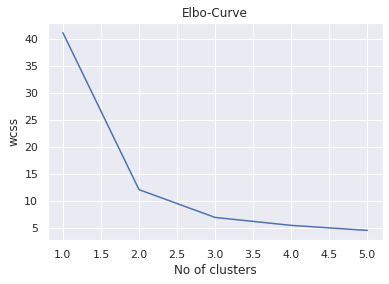

In [38]:
plt.plot(cluster,inertia)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbo-Curve')
plt.show()

In the above curve, we can see that there are two sharp points, one at 2 and other at 3. It means we can have two possible cluster size, k=2 or 3. We take k=3. 

**Step 7: Applying K-Means**

In [44]:
kmeans = KMeans(n_clusters =3, max_iter = 300)
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
km_pred = kmeans.predict(new_df)

In [46]:
centers = kmeans.cluster_centers_

The cluster plot is in 4-D space as we have 4 features

In [47]:
values_iris = new_df.values

**Step 8: Visualizing Clusters**

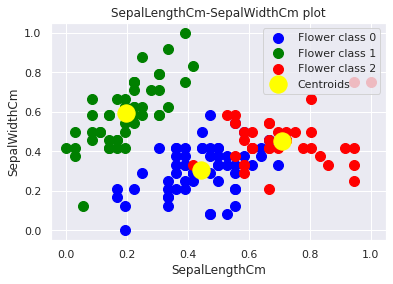

In [56]:
plt.scatter(values_iris[km_pred == 0, 0 ], values_iris[km_pred == 0, 1],s=100, c='blue',label = 'Flower class 0')
plt.scatter(values_iris[km_pred == 1, 0 ], values_iris[km_pred == 1, 1],s=100, c='green',label = 'Flower class 1')
plt.scatter(values_iris[km_pred == 2, 0 ], values_iris[km_pred == 2, 1],s=100, c='red',label = 'Flower class 2')
plt.scatter(centers[:,0], centers[:,1], s = 300, c= 'yellow',label = 'Centroids')
plt.legend()
plt.title('SepalLengthCm-SepalWidthCm plot')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()